In [1]:
##################################################################################
#                        Anti-Correlation Region Analysis                        #
#                 Analyzing with different cryocycle comparisons                 #
#     and with a higher anti-correlation threshold (and the normal threshold)    #
#                              Author: Steven Doran                              #
##################################################################################

'''
We want to compare the number (and size) of the ACRs between cryocycles.
We want to see if there is a larger change (more and larger ACRs) between [0] and [5],
then between [5] and [20] or [20] and [100]. This differs from the main code, as the main
code just runs analysis comparing [0] and [100].
'''

import cv2 as cv
import numpy as np

cryo = ['[0]_[5]', '[5]_[20]', '[20]_[100]']
C_N = ['[0][5]', '[5][20]', '[20][100]']

# [0] = [0]_[5]   [1] = [5]_[20]  [2] = [20]_[100]
ACR = [[] for i in range(0,3)]   # Anti-correlation regions
for i in range(0,3):
    for j in range(0,3):
        ACR[i].append([])
for CC in range(0,3):
    for i in range(0,3):
        for j in range(0,100):
            ACR[CC][i].append([])
            
# High Threshold
ACR_HT = [[] for i in range(0,3)]   # Anti-correlation regions
for i in range(0,3):
    for j in range(0,3):
        ACR_HT[i].append([])
for CC in range(0,3):
    for i in range(0,3):
        for j in range(0,100):
            ACR_HT[CC][i].append([])
        
# ACR[CC][0] = x coordinate of center position
# ACR[CC][1] = y coordinare of center position
# ACR[CC][2] = area of contour

def ACR_finder(CC,ChipIndex):

    ####################################################################################################
    # Normal
    path = 'Automated_Images/Neg/' + cryo[CC] + '/t100-150/ASIC_' + str(ChipIndex+20) + '_neg' + C_N[CC]
    # Crop image so that we are only focused on the central plot region
    img = cv.imread(path + '_t100_150.png')
    # img['top':'bottom', 'left:right'] -- x and y flipped (y, x)
    crop_img = img[118:1391, 203:1365]
    cv.imwrite("junk.png",crop_img)

    image = cv.imread("junk.png")
    gray = cv.cvtColor(image, cv.COLOR_BGR2GRAY)
    blur = cv.GaussianBlur(gray, (5, 5),
                           cv.BORDER_DEFAULT)
    ret, thresh = cv.threshold(blur, 200, 255,
                               cv.THRESH_BINARY_INV)

    # create negative
    cv.imwrite("thresh_junk.png", thresh)

    # Contour finding
    contours, hierarchies = cv.findContours(
        thresh, cv.RETR_LIST, cv.CHAIN_APPROX_SIMPLE)

    blank = np.zeros(thresh.shape[:2],
                     dtype='uint8')

    cv.drawContours(blank, contours, -1,
                    (255, 0, 0), 1)

    cv.imwrite("Contours_junk.png", blank)


    for i in range(len(contours)):
        ACR[CC][0][ChipIndex].append([])
        ACR[CC][1][ChipIndex].append([])
        ACR[CC][2][ChipIndex].append([])

    a = []
    # Finding centers
    for i in range(len(contours)):
        M = cv.moments(contours[i])
        if M['m00'] != 0:
            cx = int(M['m10']/M['m00'])
            cy = int(M['m01']/M['m00'])
            cv.drawContours(image, [contours[i]], -1, (0, 255, 0), 2)
            cv.circle(image, (cx, cy), 7, (0, 0, 255), -1)
            cv.putText(image, "center", (cx - 20, cy - 20),
                       cv.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 0), 2)

        ACR[CC][0][ChipIndex][i].append(cx)
        ACR[CC][1][ChipIndex][i].append(cy)
        ACR[CC][2][ChipIndex][i].append(cv.contourArea(contours[i]))

        #print(f"x: {cx} y: {cy}")

    image_path = 'Automated_Images/AI Contours/ASIC_' + str(ChipIndex+20) + '_' + cryo[CC] + '_contour.png'
    cv.imwrite(image_path, image)
    
    ####################################################################################################
    # High Threshold
    path = 'Automated_Images/High_Neg/' + cryo[CC] + '/t100-150/ASIC_' + str(ChipIndex+20) + '_HTneg' + C_N[CC]
    # Crop image so that we are only focused on the central plot region
    img = cv.imread(path + '_t100_150.png')
    # img['top':'bottom', 'left:right'] -- x and y flipped (y, x)
    crop_img = img[118:1391, 203:1365]
    cv.imwrite("junk.png",crop_img)

    image = cv.imread("junk.png")
    gray = cv.cvtColor(image, cv.COLOR_BGR2GRAY)
    blur = cv.GaussianBlur(gray, (5, 5),
                           cv.BORDER_DEFAULT)
    ret, thresh = cv.threshold(blur, 200, 255,
                               cv.THRESH_BINARY_INV)

    # create negative
    cv.imwrite("thresh_junk.png", thresh)

    # Contour finding
    contours, hierarchies = cv.findContours(
        thresh, cv.RETR_LIST, cv.CHAIN_APPROX_SIMPLE)

    blank = np.zeros(thresh.shape[:2],
                     dtype='uint8')

    cv.drawContours(blank, contours, -1,
                    (255, 0, 0), 1)

    cv.imwrite("Contours_junk.png", blank)


    for i in range(len(contours)):
        ACR_HT[CC][0][ChipIndex].append([])
        ACR_HT[CC][1][ChipIndex].append([])
        ACR_HT[CC][2][ChipIndex].append([])

    a = []
    # Finding centers
    for i in range(len(contours)):
        M = cv.moments(contours[i])
        if M['m00'] != 0:
            cx = int(M['m10']/M['m00'])
            cy = int(M['m01']/M['m00'])
            cv.drawContours(image, [contours[i]], -1, (0, 255, 0), 2)
            cv.circle(image, (cx, cy), 7, (0, 0, 255), -1)
            cv.putText(image, "center", (cx - 20, cy - 20),
                       cv.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 0), 2)

        ACR_HT[CC][0][ChipIndex][i].append(cx)
        ACR_HT[CC][1][ChipIndex][i].append(cy)
        ACR_HT[CC][2][ChipIndex][i].append(cv.contourArea(contours[i]))

        #print(f"x: {cx} y: {cy}")

    image_path = 'Automated_Images/AI Contours HT/ASIC_' + str(ChipIndex+20) + '_' + cryo[CC] + '_HTcontour.png'
    cv.imwrite(image_path, image)
    

    return


from tqdm.notebook import trange, tqdm
print('####### Total Progress #######')
for c in trange(0,3):
    print(cryo[c])
    for i in trange(20,120):
        ASIC_N = i
        CI = ASIC_N - 20
        ACR_finder(c,CI)
        

print('\ndone')

####### Total Progress #######


  0%|          | 0/3 [00:00<?, ?it/s]

[0]_[5]


  0%|          | 0/100 [00:00<?, ?it/s]

[5]_[20]


  0%|          | 0/100 [00:00<?, ?it/s]

[20]_[100]


  0%|          | 0/100 [00:00<?, ?it/s]


done


### Remove 'noise'

In [2]:
import matplotlib.pyplot as plt
import numpy as np

X_pos = [[] for i in range(0,3)];
Y_pos = [[] for i in range(0,3)];
Area_XY = [[] for i in range(0,3)];

# HT
X_pos_HT = [[] for i in range(0,3)];
Y_pos_HT = [[] for i in range(0,3)];
Area_XY_HT = [[] for i in range(0,3)];

'''First, remove ASICs with poor scans to limit number of ACRs'''

for c in range(0,3):
    for i in range(len(ACR[c][0])):
        for j in range(len(ACR[c][0][i])):
            for k in range(len(ACR[c][0][i][j])):
                # [0]_[5] --> omit ASICs 77, 83, 109  (3 in total)
                if c == 0:
                    if i not in [57, 63, 89]:
                        X_pos[c].append(ACR[c][0][i][j][0])
                        Y_pos[c].append(ACR[c][1][i][j][0])
                        Area_XY[c].append(ACR[c][2][i][j][0])
                # [5]_[20] --> omit ASICs 109, 113, 114, 115, 117 (5 in total)
                if c == 1:
                    if i not in [89, 93, 94, 95, 97]:
                        X_pos[c].append(ACR[c][0][i][j][0])
                        Y_pos[c].append(ACR[c][1][i][j][0])
                        Area_XY[c].append(ACR[c][2][i][j][0])
                # [20]_[100] --> omit ASICs 110, 113, 114, 115, 116, 117 (6 in total)
                if c == 2:
                    if i not in [90, 93, 94, 95, 96, 97]:
                        X_pos[c].append(ACR[c][0][i][j][0])
                        Y_pos[c].append(ACR[c][1][i][j][0])
                        Area_XY[c].append(ACR[c][2][i][j][0])
                        
##### HT #####
for c in range(0,3):
    for i in range(len(ACR_HT[c][0])):
        for j in range(len(ACR_HT[c][0][i])):
            for k in range(len(ACR_HT[c][0][i][j])):
                # [0]_[5] --> omit ASICs 77, 83, 109  (3 in total)
                if c == 0:
                    if i not in [57, 63, 89]:
                        X_pos_HT[c].append(ACR_HT[c][0][i][j][0])
                        Y_pos_HT[c].append(ACR_HT[c][1][i][j][0])
                        Area_XY_HT[c].append(ACR_HT[c][2][i][j][0])
                # [5]_[20] --> omit ASICs 109, 113, 114, 115, 117 (5 in total)
                if c == 1:
                    if i not in [89, 93, 94, 95, 97]:
                        X_pos_HT[c].append(ACR_HT[c][0][i][j][0])
                        Y_pos_HT[c].append(ACR_HT[c][1][i][j][0])
                        Area_XY_HT[c].append(ACR_HT[c][2][i][j][0])
                # [20]_[100] --> omit ASICs 110, 113, 114, 115, 116, 117 (6 in total)
                if c == 2:
                    if i not in [90, 93, 94, 95, 96, 97]:
                        X_pos_HT[c].append(ACR_HT[c][0][i][j][0])
                        Y_pos_HT[c].append(ACR_HT[c][1][i][j][0])
                        Area_XY_HT[c].append(ACR_HT[c][2][i][j][0])
                
'''Next, remove the circles, which cause scattering and create ACRs that are not likely physically real'''

x_position = [[] for i in range(0,3)];   # These become the new, low-noise arrays
y_position = [[] for i in range(0,3)];
Area = [[] for i in range(0,3)];

# HT
x_position_HT = [[] for i in range(0,3)];
y_position_HT = [[] for i in range(0,3)];
Area_HT = [[] for i in range(0,3)];

for c in range(0,3):
    for i in range(len(X_pos[c])):
        x_position[c].append(X_pos[c][i])
        y_position[c].append(Y_pos[c][i])
        Area[c].append(Area_XY[c][i])

for c in range(0,3):
    for i in range(len(x_position[c]) - 1, -1, -1):  # when we remove elements, it changes the length of our array
        if x_position[c][i] > 900 and y_position[c][i] > 1000:   # Big, lower circle
            del x_position[c][i]; del y_position[c][i]; del Area[c][i]
for c in range(0,3):
    for i in range(len(x_position[c]) - 1, -1, -1):  # therefor we loop backwards through the array instead of forwards
        if x_position[c][i] < 160 and y_position[c][i] < 160:   # small, upper circle
            del x_position[c][i]; del y_position[c][i]; del Area[c][i]
            
# HT
for c in range(0,3):
    for i in range(len(X_pos_HT[c])):
        x_position_HT[c].append(X_pos_HT[c][i])
        y_position_HT[c].append(Y_pos_HT[c][i])
        Area_HT[c].append(Area_XY_HT[c][i])

for c in range(0,3):
    for i in range(len(x_position_HT[c]) - 1, -1, -1):  # when we remove elements, it changes the length of our array
        if x_position_HT[c][i] > 900 and y_position_HT[c][i] > 1000:   # Big, lower circle
            del x_position_HT[c][i]; del y_position_HT[c][i]; del Area_HT[c][i]
for c in range(0,3):
    for i in range(len(x_position_HT[c]) - 1, -1, -1):  # therefor we loop backwards through the array instead of forwards
        if x_position_HT[c][i] < 160 and y_position_HT[c][i] < 160:   # small, upper circle
            del x_position_HT[c][i]; del y_position_HT[c][i]; del Area_HT[c][i]
        
# We can be more selective with regions we are removing. This is a simple cut of the data based off
# of where we are most likely to find the noisy points

# We can also apply a cut to remove the 'central' NaN regions and the residual structure ACRs (lines)
'''Lastly, remove the inner region (NaN caused effects) and the residual structure lines'''

for c in range(0,3):
    for i in range(len(x_position[c]) - 1, -1, -1):  # when we remove elements, it changes the length of our array
        if 122 < x_position[c][i] < 1040 and 134 < y_position[c][i] < 1140:
            del x_position[c][i]; del y_position[c][i]; del Area[c][i]
            
# HT
for c in range(0,3):
    for i in range(len(x_position_HT[c]) - 1, -1, -1):  # when we remove elements, it changes the length of our array
        if 122 < x_position_HT[c][i] < 1040 and 134 < y_position_HT[c][i] < 1140:
            del x_position_HT[c][i]; del y_position_HT[c][i]; del Area_HT[c][i]

print('done')

done


***
### Area Conversion of ACRs

In [3]:
# Calculate Areas of ACRs for each 'edge'

import matplotlib.pyplot as plt
import numpy as np

# Area is the main array that has already been noise-cleaned (see above cells)
A = [[] for i in range(0,3)]   # this will be the array that has proper area units (mm^2)

# HT
A_HT = [[] for i in range(0,3)]

# We first want to convert to some proper units (areas are given in python pixel counts)
for c in range(0,3):
    for i in range(len(Area[c])):

            # ASIC 'pad' is 1.4cm x 1.4cm (14 mm x 14 mm)  (each SAM pixel is around 128um)
            # Total ASIC area = 1.96 cm^2 = 192 mm^2   (um too small for area) 
            # ASIC image pixel dimensions: height (y) =  1273, width (x) =  1162
            # ASIC image area = 1479226 pixels^2

            # Area Calculation:
            sq = Area[c][i]
            # unit conversion to um^2
            area_conversion = 192/1479226   # mm^2 in a square pixel
            area_ACR = area_conversion*sq

            A[c].append(round(area_ACR,5))
        
# HT
for c in range(0,3):
    for i in range(len(Area_HT[c])):
            # Area Calculation:
            sq = Area_HT[c][i]
            # unit conversion to um^2
            area_conversion = 192/1479226   # mm^2 in a square pixel
            area_ACR = area_conversion*sq

            A_HT[c].append(round(area_ACR,5))
        
#######################################################################

print('done')

done


### Bar Graph displaying the number of ACRs per cryocycle

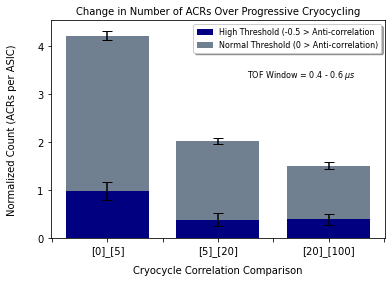

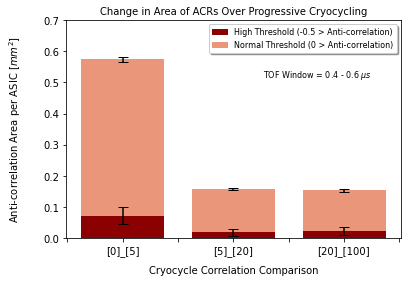

done


In [7]:
# Arrays we need:
# x_position[cryocycle], y_position[cryocycle], A[cryocycle]

N_0_5 = len(x_position[0])
N_5_20 = len(x_position[1])
N_20_100 = len(x_position[2])

N_0_5_HT = len(x_position_HT[0])
N_5_20_HT = len(x_position_HT[1])
N_20_100_HT = len(x_position_HT[2])

N = [N_0_5, N_5_20, N_20_100]
N_HT = [N_0_5_HT, N_5_20_HT, N_20_100_HT]

#################################################################################
'''Number of ACRs'''

### Stacked Bar Plot

fig, ax = plt.subplots()
ax.set_title('Change in Number of ACRs Over Progressive Cryocycling',fontdict = {'fontsize' : 10})
ax.set_xlabel('Cryocycle Correlation Comparison', loc = 'center', labelpad = 20)  # labelpad shifts the label downwards
ax.set_ylabel('Normalized Count (ACRs per ASIC)', fontsize = 10, labelpad = 20)

# Normalize heights of the bars
zero_five = N_0_5/97
five_twenty = N_5_20/95
twenty_hundred = N_20_100/94

zero_five_HT = N_0_5_HT/97
five_twenty_HT = N_5_20_HT/95
twenty_hundred_HT = N_20_100_HT/94

Norm_factor = [97, 95, 94]

# label Cryocycles
labels = ['[0]_[5]', '[5]_[20]', '[20]_[100]']

norm = [zero_five, five_twenty, twenty_hundred]
HT = [zero_five_HT, five_twenty_HT, twenty_hundred_HT]

# error bars (must be normalized like the plot --> sqrt(N) each bin, then normalize)
error = []; error_HT = []
for i in range(0,3):
    er = (1/np.sqrt(N[i]))*N[i]
    er_HT = (1/np.sqrt(N_HT[i]))*N_HT[i]
    er = er/Norm_factor[i]
    er_HT = er_HT/Norm_factor[i]
    error.append(er)
    error_HT.append(er_HT)

# HT Bar Graph - Stacked (this will be on the bottom)
ax.bar([1, 2, 3], HT, yerr = error, width = .75, bottom = None,
       align = 'center', color = 'navy', linewidth = 2, label = 'High Threshold (-0.5 > Anti-correlation', capsize = 5)

# Plot Bar Graph
ax.bar([1, 2, 3], norm, yerr = error_HT, width = .75, bottom = HT, align = 'center',
        color = 'slategrey', linewidth = 2, label = 'Normal Threshold (0 > Anti-correlation)', capsize = 5)
# capsize argument controls the width of the yerror bar 'caps'

# Label CC for the bar xtick label
plt.text(.17, -0.06, labels[0], ha='center', va='center', rotation = 0, fontsize = 10, transform=ax.transAxes)
plt.text(.50, -0.06, labels[1], ha='center', va='center', rotation = 0, fontsize = 10, transform=ax.transAxes)
plt.text(.83, -0.06, labels[2], ha='center', va='center', rotation = 0, fontsize = 10, transform=ax.transAxes)

plt.text(0.75, 0.75, 'TOF Window = 0.4 - 0.6 ' + r'$\mu s$', ha='center', va='center', fontsize = 8, transform=ax.transAxes)

ax.set_xticklabels([])
#ax.yaxis.grid(True)

plt.legend(shadow = True, loc = 'upper right', fontsize = 8)

#path = 'ACR Plots/By Cryocycle/ACR count per CC _ Bar Plot _ Norm and HT.png'
path = '../../ACR count per CC _ Bar Plot _ Norm and HT _ with errors.png'
plt.savefig(path,dpi=300, bbox_inches='tight', pad_inches=.3,facecolor = 'w')
plt.show()


#################################################################################
'''Total Area of ACRs'''

fig, ax = plt.subplots()
ax.set_title('Change in Area of ACRs Over Progressive Cryocycling',fontdict = {'fontsize' : 10})
ax.set_xlabel('Cryocycle Correlation Comparison', loc = 'center', labelpad = 20)  # labelpad shifts the label downwards
ax.set_ylabel('Anti-correlation Area per ASIC [' + r'$mm^2$' + ']', fontsize = 10, labelpad = 20)

# sum all areas in each CC, normalize by dividing by the number of ASICs used in each CC
zero_five_A = sum(A[0])/97
five_twenty_A = sum(A[1])/95
twenty_hundred_A = sum(A[2])/94

zero_five_A_HT = sum(A_HT[0])/97
five_twenty_A_HT = sum(A_HT[1])/95
twenty_hundred_A_HT = sum(A_HT[2])/94

# label Cryocycles
labels = ['[0]_[5]', '[5]_[20]', '[20]_[100]']

norm = [zero_five_A, five_twenty_A, twenty_hundred_A]

HT = [zero_five_A_HT, five_twenty_A_HT, twenty_hundred_A_HT]


# errorbars are the same percent as the counts; we can just re-apply them here
error = []; error_HT = []
for i in range(0,3):
    er = (1/np.sqrt(N[i]))*sum(A[i])    # percent error is the same, but must multiply by the actual value (area)
    er_HT = (1/np.sqrt(N_HT[i]))*sum(A_HT[i])
    er = er/Norm_factor[i]
    er_HT = er_HT/Norm_factor[i]
    error.append(er)
    error_HT.append(er_HT)

# HT
ax.bar([1, 2, 3], HT, yerr = error, width = .75, bottom = None, align = 'center',
        color = 'darkred', linewidth = 2, label = 'High Threshold (-0.5 > Anti-correlation)', capsize = 5)

# Plot Bar Graph
ax.bar([1, 2, 3], norm, yerr= error_HT, width = .75, bottom = HT, align = 'center',
        color = 'darksalmon', linewidth = 2, label = 'Normal Threshold (0 > Anti-correlation)', capsize = 5)

# Label CC for the bar xtick label
plt.text(.17, -0.06, labels[0], ha='center', va='center', rotation = 0, fontsize = 10, transform=ax.transAxes)
plt.text(.50, -0.06, labels[1], ha='center', va='center', rotation = 0, fontsize = 10, transform=ax.transAxes)
plt.text(.83, -0.06, labels[2], ha='center', va='center', rotation = 0, fontsize = 10, transform=ax.transAxes)

plt.text(0.75, 0.75, 'TOF Window = 0.4 - 0.6 ' + r'$\mu s$', ha='center', va='center', fontsize = 8, transform=ax.transAxes)

ax.set_xticklabels([])
plt.ylim([0,.7])
#ax.yaxis.grid(True)

plt.legend(shadow = True, loc = 'upper right', fontsize = 8)

#path = 'ACR Plots/By Cryocycle/ACR area per CC _ Bar Plot _ Norm and HT.png'
path = '../../ACR area per CC _ Bar Plot _ Norm and HT _ with errors.png'
plt.savefig(path,dpi=300, bbox_inches='tight', pad_inches=.3,facecolor = 'w')
plt.show()

#######################################################################################

print('done')

### Same bar plot but with Faulty vs Nominal ASICs

In [28]:
import matplotlib.pyplot as plt
import numpy as np

X_pos_F = [[] for i in range(0,3)]; X_pos_Nom = [[] for i in range(0,3)];
Y_pos_F = [[] for i in range(0,3)]; Y_pos_Nom = [[] for i in range(0,3)];

# HT
X_pos_HT_F = [[] for i in range(0,3)]; X_pos_HT_Nom = [[] for i in range(0,3)];
Y_pos_HT_F = [[] for i in range(0,3)]; Y_pos_HT_Nom = [[] for i in range(0,3)];


# Faulty ASICs: 
# [7, 21, 29, 33, 48, 50, 54, 55, 60, 68, 75, 88, 91, 94, 98]

'''First, remove ASICs with poor scans to limit number of ACRs'''

for c in range(0,3):
    for i in range(len(ACR[c][0])):
        for j in range(len(ACR[c][0][i])):
            for k in range(len(ACR[c][0][i][j])):
                # [0]_[5] --> omit ASICs 77, 83, 109  (3 in total)
                if c == 0:
                    if i not in [57, 63, 89]:
                        # Omit 3, # of Faulty = 15
                        if i in [7, 21, 29, 33, 48, 50, 54, 55, 60, 68, 75, 88, 91, 94, 98]:
                            X_pos_F[c].append(ACR[c][0][i][j][0])
                            Y_pos_F[c].append(ACR[c][1][i][j][0])
                        else:
                            X_pos_Nom[c].append(ACR[c][0][i][j][0])
                            Y_pos_Nom[c].append(ACR[c][1][i][j][0])
                # [5]_[20] --> omit ASICs 109, 113, 114, 115, 117 (5 in total), # of Faulty = 14
                if c == 1:
                    if i not in [89, 93, 94, 95, 97]:
                        if i in [7, 21, 29, 33, 48, 50, 54, 55, 60, 68, 75, 88, 91, 98]:
                            X_pos_F[c].append(ACR[c][0][i][j][0])
                            Y_pos_F[c].append(ACR[c][1][i][j][0])
                        else:
                            X_pos_Nom[c].append(ACR[c][0][i][j][0])
                            Y_pos_Nom[c].append(ACR[c][1][i][j][0])
                # [20]_[100] --> omit ASICs 110, 113, 114, 115, 116, 117 (6 in total), # of Faulty = 14
                if c == 2:
                    if i not in [90, 93, 94, 95, 96, 97]:
                        if i in [7, 21, 29, 33, 48, 50, 54, 55, 60, 68, 75, 88, 91, 98]:
                            X_pos_F[c].append(ACR[c][0][i][j][0])
                            Y_pos_F[c].append(ACR[c][1][i][j][0])
                        else:
                            X_pos_Nom[c].append(ACR[c][0][i][j][0])
                            Y_pos_Nom[c].append(ACR[c][1][i][j][0])
                        
##### HT #####
for c in range(0,3):
    for i in range(len(ACR_HT[c][0])):
        for j in range(len(ACR_HT[c][0][i])):
            for k in range(len(ACR_HT[c][0][i][j])):
                # [0]_[5] --> omit ASICs 77, 83, 109  (3 in total)
                if c == 0:
                    if i not in [57, 63, 89]:
                        # Omit 3, # of Faulty = 15
                        if i in [7, 21, 29, 33, 48, 50, 54, 55, 60, 68, 75, 88, 91, 94, 98]:
                            X_pos_HT_F[c].append(ACR_HT[c][0][i][j][0])
                            Y_pos_HT_F[c].append(ACR_HT[c][1][i][j][0])
                        else:
                            X_pos_HT_Nom[c].append(ACR_HT[c][0][i][j][0])
                            Y_pos_HT_Nom[c].append(ACR_HT[c][1][i][j][0])
                # [5]_[20] --> omit ASICs 109, 113, 114, 115, 117 (5 in total), # of Faulty = 14
                if c == 1:
                    if i not in [89, 93, 94, 95, 97]:
                        if i in [7, 21, 29, 33, 48, 50, 54, 55, 60, 68, 75, 88, 91, 98]:
                            X_pos_HT_F[c].append(ACR_HT[c][0][i][j][0])
                            Y_pos_HT_F[c].append(ACR_HT[c][1][i][j][0])
                        else:
                            X_pos_HT_Nom[c].append(ACR_HT[c][0][i][j][0])
                            Y_pos_HT_Nom[c].append(ACR_HT[c][1][i][j][0])
                # [20]_[100] --> omit ASICs 110, 113, 114, 115, 116, 117 (6 in total), # of Faulty = 14
                if c == 2:
                    if i not in [90, 93, 94, 95, 96, 97]:
                        if i in [7, 21, 29, 33, 48, 50, 54, 55, 60, 68, 75, 88, 91, 98]:
                            X_pos_HT_F[c].append(ACR_HT[c][0][i][j][0])
                            Y_pos_HT_F[c].append(ACR_HT[c][1][i][j][0])
                        else:
                            X_pos_HT_Nom[c].append(ACR_HT[c][0][i][j][0])
                            Y_pos_HT_Nom[c].append(ACR_HT[c][1][i][j][0])

                
'''Next, remove the circles, which cause scattering and create ACRs that are not likely physically real'''

x_position_F = [[] for i in range(0,3)];   # These become the new, low-noise arrays
y_position_F = [[] for i in range(0,3)];
x_position_Nom = [[] for i in range(0,3)];
y_position_Nom = [[] for i in range(0,3)];

# HT
x_position_HT_F = [[] for i in range(0,3)];
y_position_HT_F = [[] for i in range(0,3)];
x_position_HT_Nom = [[] for i in range(0,3)];
y_position_HT_Nom = [[] for i in range(0,3)];

for c in range(0,3):
    for i in range(len(X_pos_Nom[c])):
        x_position_Nom[c].append(X_pos_Nom[c][i])
        y_position_Nom[c].append(Y_pos_Nom[c][i])
for c in range(0,3):
    for i in range(len(X_pos_F[c])):
        x_position_F[c].append(X_pos_F[c][i])
        y_position_F[c].append(Y_pos_F[c][i])

for c in range(0,3):
    for i in range(len(x_position_Nom[c]) - 1, -1, -1):  # when we remove elements, it changes the length of our array
        if x_position_Nom[c][i] > 900 and y_position_Nom[c][i] > 1000:   # Big, lower circle
            del x_position_Nom[c][i]; del y_position_Nom[c][i]; 
for c in range(0,3):
    for i in range(len(x_position_Nom[c]) - 1, -1, -1):  # therefore we loop backwards through the array instead of forwards
        if x_position_Nom[c][i] < 160 and y_position_Nom[c][i] < 160:   # small, upper circle
            del x_position_Nom[c][i]; del y_position_Nom[c][i]; 
            
for c in range(0,3):
    for i in range(len(x_position_F[c]) - 1, -1, -1):  # when we remove elements, it changes the length of our array
        if x_position_F[c][i] > 900 and y_position_F[c][i] > 1000:   # Big, lower circle
            del x_position_F[c][i]; del y_position_F[c][i]; 
for c in range(0,3):
    for i in range(len(x_position_F[c]) - 1, -1, -1):  # therefore we loop backwards through the array instead of forwards
        if x_position_F[c][i] < 160 and y_position_F[c][i] < 160:   # small, upper circle
            del x_position_F[c][i]; del y_position_F[c][i]; 
            
# HT
for c in range(0,3):
    for i in range(len(X_pos_HT_Nom[c])):
        x_position_HT_Nom[c].append(X_pos_HT_Nom[c][i])
        y_position_HT_Nom[c].append(Y_pos_HT_Nom[c][i])
for c in range(0,3):
    for i in range(len(X_pos_HT_F[c])):
        x_position_HT_F[c].append(X_pos_HT_F[c][i])
        y_position_HT_F[c].append(Y_pos_HT_F[c][i])

for c in range(0,3):
    for i in range(len(x_position_HT_Nom[c]) - 1, -1, -1):  # when we remove elements, it changes the length of our array
        if x_position_HT_Nom[c][i] > 900 and y_position_HT_Nom[c][i] > 1000:   # Big, lower circle
            del x_position_HT_Nom[c][i]; del y_position_HT_Nom[c][i]; 
for c in range(0,3):
    for i in range(len(x_position_HT_Nom[c]) - 1, -1, -1):  # therefore we loop backwards through the array instead of forwards
        if x_position_HT_Nom[c][i] < 160 and y_position_HT_Nom[c][i] < 160:   # small, upper circle
            del x_position_HT_Nom[c][i]; del y_position_HT_Nom[c][i]; 
            
for c in range(0,3):
    for i in range(len(x_position_HT_F[c]) - 1, -1, -1):  # when we remove elements, it changes the length of our array
        if x_position_HT_F[c][i] > 900 and y_position_HT_F[c][i] > 1000:   # Big, lower circle
            del x_position_HT_F[c][i]; del y_position_HT_F[c][i]; 
for c in range(0,3):
    for i in range(len(x_position_HT_F[c]) - 1, -1, -1):  # therefore we loop backwards through the array instead of forwards
        if x_position_HT_F[c][i] < 160 and y_position_HT_F[c][i] < 160:   # small, upper circle
            del x_position_HT_F[c][i]; del y_position_HT_F[c][i]; 
        
# We can be more selective with regions we are removing. This is a simple cut of the data based off
# of where we are most likely to find the noisy points


# We can also apply a cut to remove the 'central' NaN regions and the residual structure ACRs (lines)
'''Lastly, remove the inner region (NaN caused effects) and the residual structure lines'''

for c in range(0,3):
    for i in range(len(x_position_Nom[c]) - 1, -1, -1):  # when we remove elements, it changes the length of our array
        if 122 < x_position_Nom[c][i] < 1040 and 134 < y_position_Nom[c][i] < 1140:
            del x_position_Nom[c][i]; del y_position_Nom[c][i]; 
            
for c in range(0,3):
    for i in range(len(x_position_F[c]) - 1, -1, -1):  # when we remove elements, it changes the length of our array
        if 122 < x_position_F[c][i] < 1040 and 134 < y_position_F[c][i] < 1140:
            del x_position_F[c][i]; del y_position_F[c][i]; 
            
# HT
for c in range(0,3):
    for i in range(len(x_position_HT_Nom[c]) - 1, -1, -1):  # when we remove elements, it changes the length of our array
        if 122 < x_position_HT_Nom[c][i] < 1040 and 134 < y_position_HT_Nom[c][i] < 1140:
            del x_position_HT_Nom[c][i]; del y_position_HT_Nom[c][i]; 
            
for c in range(0,3):
    for i in range(len(x_position_HT_F[c]) - 1, -1, -1):  # when we remove elements, it changes the length of our array
        if 122 < x_position_HT_F[c][i] < 1040 and 134 < y_position_HT_F[c][i] < 1140:
            del x_position_HT_F[c][i]; del y_position_HT_F[c][i]; 

            
print('done')

done


### Bar Plots

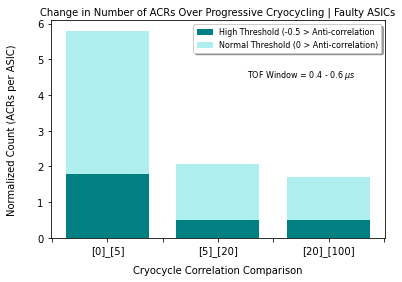

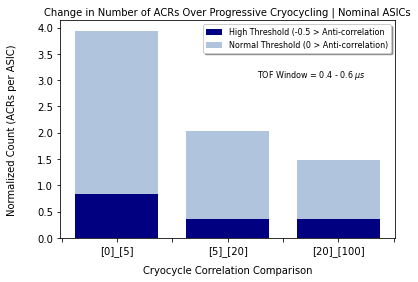

done


In [46]:
# Arrays we need:
# x_position[cryocycle], y_position[cryocycle], A[cryocycle]

N_0_5_F = len(x_position_F[0])
N_5_20_F = len(x_position_F[1])
N_20_100_F = len(x_position_F[2])
N_0_5_Nom = len(x_position_Nom[0])
N_5_20_Nom = len(x_position_Nom[1])
N_20_100_Nom = len(x_position_Nom[2])

N_0_5_HT_F = len(x_position_HT_F[0])
N_5_20_HT_F = len(x_position_HT_F[1])
N_20_100_HT_F = len(x_position_HT_F[2])
N_0_5_HT_Nom = len(x_position_HT_Nom[0])
N_5_20_HT_Nom = len(x_position_HT_Nom[1])
N_20_100_HT_Nom = len(x_position_HT_Nom[2])

#################################################################################
'''Number of ACRs - Faulty'''

fig, ax = plt.subplots()
ax.set_title('Change in Number of ACRs Over Progressive Cryocycling | Faulty ASICs',fontdict = {'fontsize' : 10})
ax.set_xlabel('Cryocycle Correlation Comparison', loc = 'center', labelpad = 20)  # labelpad shifts the label downwards
ax.set_ylabel('Normalized Count (ACRs per ASIC)', fontsize = 10, labelpad = 20)

# Normalize heights of the bars
zero_five_F = N_0_5_F/15
five_twenty_F = N_5_20_F/14
twenty_hundred_F = N_20_100_F/14

zero_five_HT_F = N_0_5_HT_F/15
five_twenty_HT_F = N_5_20_HT_F/14
twenty_hundred_HT_F = N_20_100_HT_F/14

# label Cryocycles
labels = ['[0]_[5]', '[5]_[20]', '[20]_[100]']

norm = [zero_five_F, five_twenty_F, twenty_hundred_F]
HT = [zero_five_HT_F, five_twenty_HT_F, twenty_hundred_HT_F]

# HT Bar Graph - Stacked (this will be on the bottom)
ax.bar([1, 2, 3], HT, width = .75, bottom = None,
       align = 'center', color = 'teal', linewidth = 2, label = 'High Threshold (-0.5 > Anti-correlation')

# Plot Bar Graph
ax.bar([1, 2, 3], norm, width = .75, bottom = HT, align = 'center',
        color = 'paleturquoise', linewidth = 2, label = 'Normal Threshold (0 > Anti-correlation)')

# Label CC for the bar xtick label
plt.text(.17, -0.06, labels[0], ha='center', va='center', rotation = 0, fontsize = 10, transform=ax.transAxes)
plt.text(.50, -0.06, labels[1], ha='center', va='center', rotation = 0, fontsize = 10, transform=ax.transAxes)
plt.text(.83, -0.06, labels[2], ha='center', va='center', rotation = 0, fontsize = 10, transform=ax.transAxes)

plt.text(0.75, 0.75, 'TOF Window = 0.4 - 0.6 ' + r'$\mu s$', ha='center', va='center', fontsize = 8, transform=ax.transAxes)

ax.set_xticklabels([])

plt.legend(shadow = True, loc = 'upper right', fontsize = 8)

#path = 'ACR Plots/By Cryocycle/ACR count per CC _ Bar Plot _ Norm and HT.png'
path = '../../../../ACR count per CC _ Faulty ASIC _ Norm and HT'
plt.savefig(path,dpi=300, bbox_inches='tight', pad_inches=.3,facecolor = 'w')
plt.show()

#################################################################################
'''Number of ACRs - Nominal'''

fig, ax = plt.subplots()
ax.set_title('Change in Number of ACRs Over Progressive Cryocycling | Nominal ASICs',fontdict = {'fontsize' : 10})
ax.set_xlabel('Cryocycle Correlation Comparison', loc = 'center', labelpad = 20)  # labelpad shifts the label downwards
ax.set_ylabel('Normalized Count (ACRs per ASIC)', fontsize = 10, labelpad = 20)

# Normalize heights of the bars
zero_five_Nom = N_0_5_Nom/82
five_twenty_Nom = N_5_20_Nom/81
twenty_hundred_Nom = N_20_100_Nom/80

zero_five_HT_Nom = N_0_5_HT_Nom/82
five_twenty_HT_Nom = N_5_20_HT_Nom/81
twenty_hundred_HT_Nom = N_20_100_HT_Nom/80

# label Cryocycles
labels = ['[0]_[5]', '[5]_[20]', '[20]_[100]']

norm = [zero_five_Nom, five_twenty_Nom, twenty_hundred_Nom]
HT = [zero_five_HT_Nom, five_twenty_HT_Nom, twenty_hundred_HT_Nom]

# HT Bar Graph - Stacked (this will be on the bottom)
ax.bar([1, 2, 3], HT, width = .75, bottom = None,
       align = 'center', color = 'navy', linewidth = 2, label = 'High Threshold (-0.5 > Anti-correlation')

# Plot Bar Graph
ax.bar([1, 2, 3], norm, width = .75, bottom = HT, align = 'center',
        color = 'lightsteelblue', linewidth = 2, label = 'Normal Threshold (0 > Anti-correlation)')

# Label CC for the bar xtick label
plt.text(.17, -0.06, labels[0], ha='center', va='center', rotation = 0, fontsize = 10, transform=ax.transAxes)
plt.text(.50, -0.06, labels[1], ha='center', va='center', rotation = 0, fontsize = 10, transform=ax.transAxes)
plt.text(.83, -0.06, labels[2], ha='center', va='center', rotation = 0, fontsize = 10, transform=ax.transAxes)

plt.text(0.75, 0.75, 'TOF Window = 0.4 - 0.6 ' + r'$\mu s$', ha='center', va='center', fontsize = 8, transform=ax.transAxes)

ax.set_xticklabels([])

plt.legend(shadow = True, loc = 'upper right', fontsize = 8)

#path = 'ACR Plots/By Cryocycle/ACR count per CC _ Bar Plot _ Norm and HT.png'
path = '../../../../ACR count per CC _ Nominal ASIC _ Norm and HT'
plt.savefig(path,dpi=300, bbox_inches='tight', pad_inches=.3,facecolor = 'w')
plt.show()

#######################################################################################


print('done')